In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
import math
import random


## preprocesing

In [89]:
# inthe main file we cannot see headers so we are going to use it as follows
df = pd.read_csv(rf"data/adult.data",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32961,NaN,Private,252024.0,NaN,9.0,Never-married,Handlers-cleaners,Other-relative,NaN,Male,0.0,NaN,20.0,Mexico,<=50K
32962,NaN,NaN,96480.0,HS-grad,9.0,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,United-States,<=50K
32963,56.0,Private,133819.0,NaN,NaN,NaN,NaN,Not-in-family,White,NaN,NaN,0.0,40.0,NaN,NaN
32964,NaN,Private,NaN,HS-grad,NaN,Never-married,NaN,NaN,NaN,NaN,NaN,0.0,40.0,NaN,<=50K


In [90]:
df.describe()

,0,2,4,10,11,12
count,32762.000000,3.276200e+04,32767.000000,32752.000000,32758.000000,32768.000000
mean,38.585221,1.898507e+05,10.081240,1081.552516,87.218267,40.435394
std,13.641181,1.057933e+05,2.572953,7407.444113,402.717924,12.334145
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178365e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783545e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.372878e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [91]:
df.isna().sum()

0     204
1     210
2     204
3     212
4     199
5     204
6     217
7     228
8     194
9     201
10    214
11    208
12    198
13    202
14    206
dtype: int64

In [92]:
categorical_col = df.select_dtypes(include=["object"]).columns
categorical_col
for col in categorical_col:
    # replcawith  most frequent
    df[col].fillna(value=df[col].mode()[0], inplace=True)
numerical_col = df.select_dtypes(include=["float64"]).columns
for col in numerical_col:
    df[col].fillna(value=df[col].mean(),inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39.000000,State-gov,77516.000000,Bachelors,13.00000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,0.000000,40.000000,United-States,<=50K
1,50.000000,Self-emp-not-inc,83311.000000,Bachelors,13.00000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,13.000000,United-States,<=50K
2,38.000000,Private,215646.000000,HS-grad,9.00000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,40.000000,United-States,<=50K
3,53.000000,Private,234721.000000,11th,7.00000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,40.000000,United-States,<=50K
4,28.000000,Private,338409.000000,Bachelors,13.00000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,40.000000,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32961,38.585221,Private,252024.000000,HS-grad,9.00000,Never-married,Handlers-cleaners,Other-relative,White,Male,0.000000,87.218267,20.000000,Mexico,<=50K
32962,38.585221,Private,96480.000000,HS-grad,9.00000,Married-civ-spouse,Prof-specialty,Husband,White,Male,1081.552516,87.218267,40.435394,United-States,<=50K
32963,56.000000,Private,133819.000000,HS-grad,10.08124,Married-civ-spouse,Prof-specialty,Not-in-family,White,Male,1081.552516,0.000000,40.000000,United-States,<=50K
32964,38.585221,Private,189850.737043,HS-grad,10.08124,Never-married,Prof-specialty,Husband,White,Male,1081.552516,0.000000,40.000000,United-States,<=50K


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32966 entries, 0 to 32965
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32966 non-null  float64
 1   1       32966 non-null  object 
 2   2       32966 non-null  float64
 3   3       32966 non-null  object 
 4   4       32966 non-null  float64
 5   5       32966 non-null  object 
 6   6       32966 non-null  object 
 7   7       32966 non-null  object 
 8   8       32966 non-null  object 
 9   9       32966 non-null  object 
 10  10      32966 non-null  float64
 11  11      32966 non-null  float64
 12  12      32966 non-null  float64
 13  13      32966 non-null  object 
 14  14      32966 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.8+ MB


### counting plot

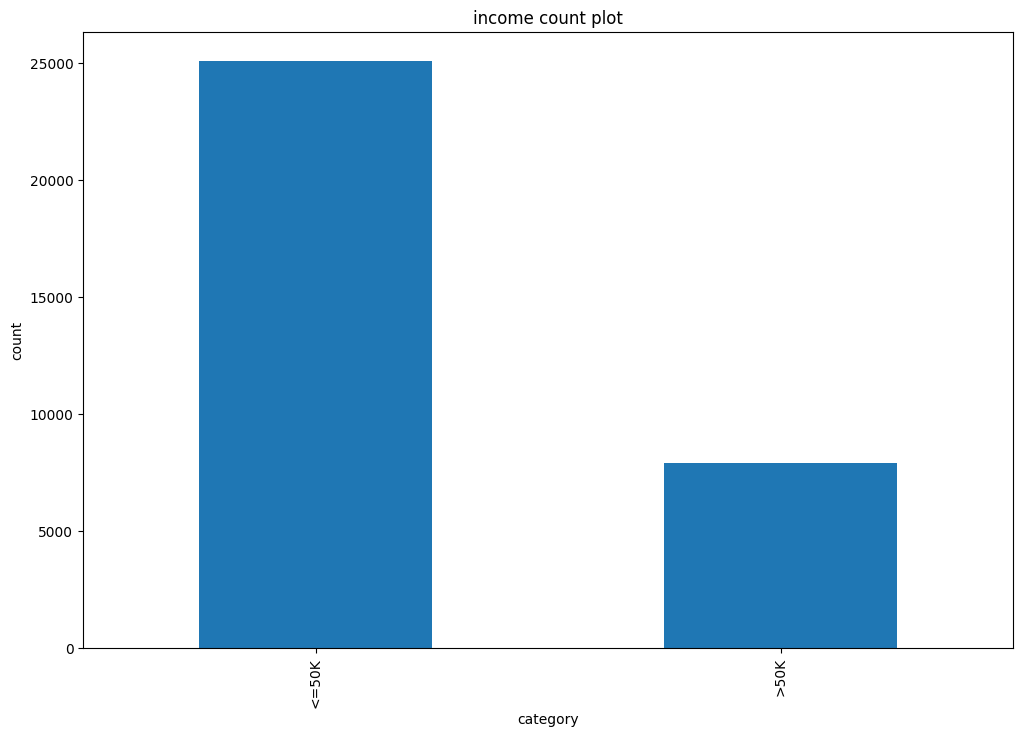

In [94]:
plt.figure(figsize=(12,8))
value_counts = df[14].value_counts()
value_counts.plot(kind="bar")
plt.xlabel("category")
plt.ylabel("count")
plt.title(rf"income" + " count plot")
plt.show()

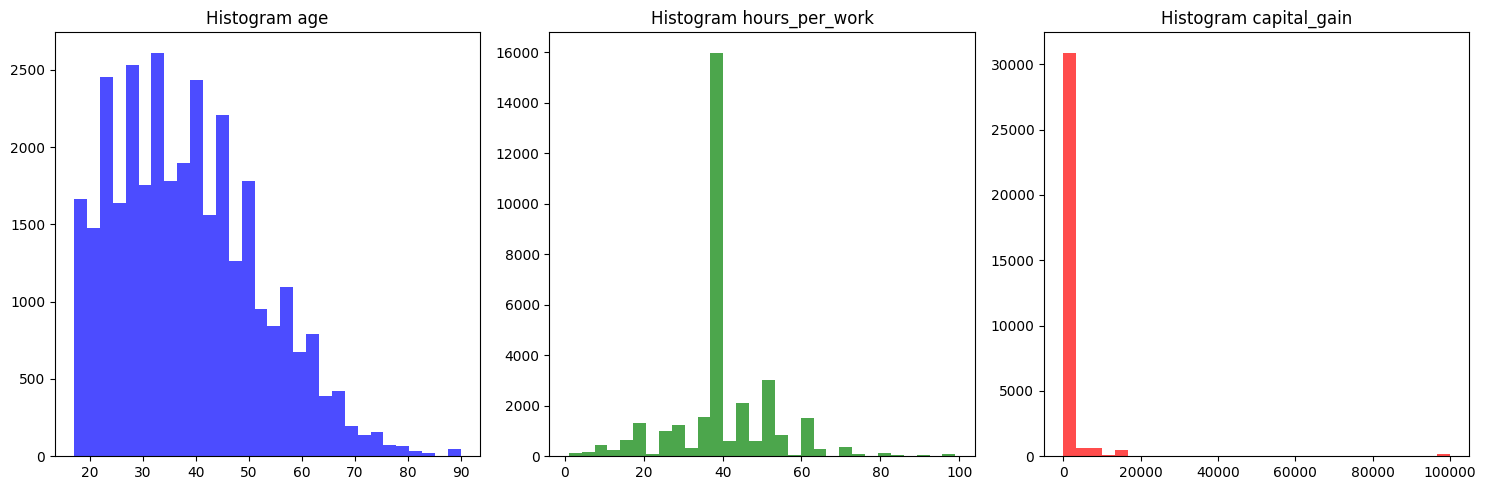

In [ ]:
# pass the second  part due to porr information
age = df[0]
h_p_w = df[12]
capital_gain = df[10]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(age, bins=30, color='blue', alpha=0.7)
axes[0].set_title("Histogram age")

axes[1].hist(h_p_w, bins=30, color='green', alpha=0.7)
axes[1].set_title("Histogram hours_per_work")

axes[2].hist(capital_gain, bins=30, color='red', alpha=0.7)
axes[2].set_title("Histogram capital_gain")

plt.tight_layout()
plt.show()


In [10]:
df[14] = np.where(df[14] == ">50K",1,0)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39.000000,State-gov,77516.000000,Bachelors,13.00000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,0.000000,40.000000,United-States,0
1,50.000000,Self-emp-not-inc,83311.000000,Bachelors,13.00000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,13.000000,United-States,0
2,38.000000,Private,215646.000000,HS-grad,9.00000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,40.000000,United-States,0
3,53.000000,Private,234721.000000,11th,7.00000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,40.000000,United-States,0
4,28.000000,Private,338409.000000,Bachelors,13.00000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,40.000000,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32961,38.585221,Private,252024.000000,HS-grad,9.00000,Never-married,Handlers-cleaners,Other-relative,White,Male,0.000000,87.218267,20.000000,Mexico,0
32962,38.585221,Private,96480.000000,HS-grad,9.00000,Married-civ-spouse,Prof-specialty,Husband,White,Male,1081.552516,87.218267,40.435394,United-States,0
32963,56.000000,Private,133819.000000,HS-grad,10.08124,Married-civ-spouse,Prof-specialty,Not-in-family,White,Male,1081.552516,0.000000,40.000000,United-States,0
32964,38.585221,Private,189850.737043,HS-grad,10.08124,Never-married,Prof-specialty,Husband,White,Male,1081.552516,0.000000,40.000000,United-States,0


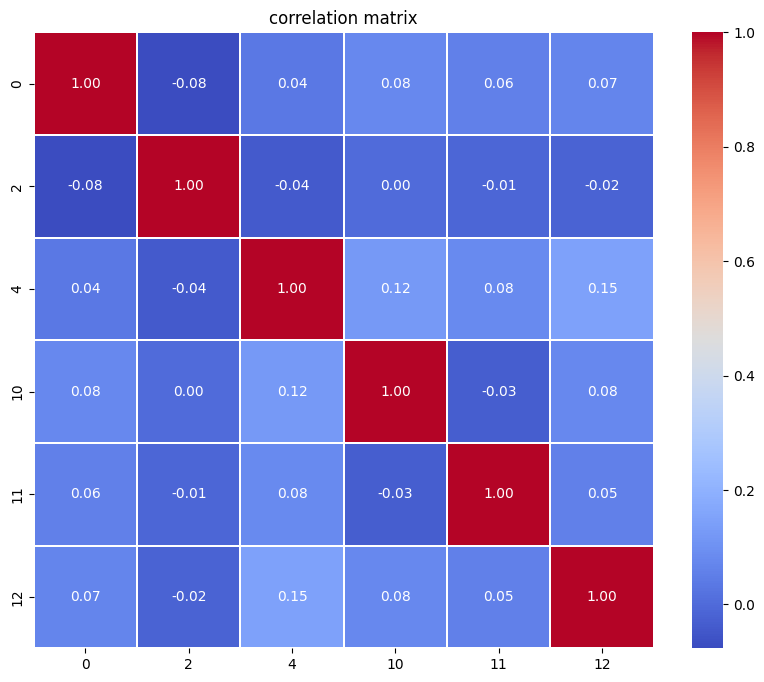

In [11]:
corr_map=df[numerical_col].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_map ,annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.2)
plt.title("correlation matrix")
plt.show()

In [12]:
# no need for elimination because thhe correlation  coeficcients are closer to 0 rather than  +-1
# 1-hotencoding witth deleting the first column
df = pd.get_dummies(df, drop_first=True).astype(float)
df

,0,2,4,10,11,12,14,1_Federal-gov,1_Local-gov,1_Never-worked,...,13_Portugal,13_Puerto-Rico,13_Scotland,13_South,13_Taiwan,13_Thailand,13_Trinadad&Tobago,13_United-States,13_Vietnam,13_Yugoslavia
0,39.000000,77516.000000,13.00000,2174.000000,0.000000,40.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.000000,83311.000000,13.00000,0.000000,0.000000,13.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.000000,215646.000000,9.00000,0.000000,0.000000,40.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.000000,234721.000000,7.00000,0.000000,0.000000,40.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.000000,338409.000000,13.00000,0.000000,0.000000,40.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32961,38.585221,252024.000000,9.00000,0.000000,87.218267,20.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32962,38.585221,96480.000000,9.00000,1081.552516,87.218267,40.435394,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32963,56.000000,133819.000000,10.08124,1081.552516,0.000000,40.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32964,38.585221,189850.737043,10.08124,1081.552516,0.000000,40.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# Standardization  on numerical columns
def Standard_Scaler(df:pd.DataFrame):
    df = (df- df.mean())/df.std()
    return df

# using only on numerical data
df[numerical_col] = Standard_Scaler(df[numerical_col])
df

,0,2,4,10,11,12,14,1_Federal-gov,1_Local-gov,1_Never-worked,...,13_Portugal,13_Puerto-Rico,13_Scotland,13_South,13_Taiwan,13_Thailand,13_Trinadad&Tobago,13_United-States,13_Vietnam,13_Yugoslavia
0,3.050093e-02,-1.065134e+00,1.137840,0.147961,-0.217261,-0.035406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.393895e-01,-1.010187e+00,1.137840,-0.146485,-0.217261,-2.231055,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-4.303439e-02,2.445851e-01,-0.421507,-0.146485,-0.217261,-0.035406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.059995e+00,4.254501e-01,-1.201181,-0.146485,-0.217261,-0.035406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-7.783876e-01,1.408597e+00,1.137840,-0.146485,-0.217261,-0.035406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32961,5.224999e-16,5.895134e-01,-0.421507,-0.146485,0.000000,-1.661813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32962,5.224999e-16,-8.853210e-01,-0.421507,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32963,1.280601e+00,-5.312808e-01,0.000000,0.000000,-0.217261,-0.035406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32964,5.224999e-16,-2.759562e-16,0.000000,0.000000,-0.217261,-0.035406,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model

In [39]:
class KNNClassifier(object):
    def __init__(self, X_train:pd.DataFrame,y_train:pd.DataFrame):
        self.X_train = X_train
        self.y_train= y_train

    def calc_distcance(self,x:pd.DataFrame,y:pd.DataFrame):
        x , y = x.to_numpy(),y.to_numpy()
        return np.linalg.norm(x -y)
    
    def predict(self,X:pd.DataFrame, k=10 ,  m=2):
        """
        find the k nearest values and label itself
        """
        X = X.to_numpy()
        ans = []
        print(len(X))
        for i in range(len(X)):
            # print(f"index: {i}")
            row = X[i]
            X_temp = self.X_train.to_numpy()
            y_temp = self.y_train.to_numpy()
            # dist = np.linalg.norm(X_temp.T - row[:,None],axis=0)
            dist = np.sum(np.abs(X_temp.T - row[:,None]) ** m,axis=0) ** (1 / m)
            # print(f"{len(dist)=}")
            # sys.exit()
            tmp = list(zip(dist.tolist(),y_temp.tolist()))
            sorted_tmp = sorted(tmp,key=lambda x: x[0])[:k]
            # print(sorted_tmp)
            # sys.exit()
            label = 0
            for _,l in sorted_tmp:
                if l == 1:
                    label +=1
            label /= k
            if 1 - label>=label:
                ans.append(0)
            else:
                ans.append(1)
        return np.array(ans)
    
    def evaluate(self,y_true:np.array, y_pred:np.array):
        """
        the inputs most be 1D numpy array
        return : the accuracy
        """
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))
        # accuracy
        match_number =0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                match_number  +=1
        accuracy = match_number / len(y_true)
        # precision
        precision = TP / (TP + FP + 1e-8) 
        # recall
        recall = TP / (TP + FN + 1e-8) 
        # F1-score
        f1score = 2 * (precision * recall) / (precision + recall + 1e-8)  
        print("=====================")
        print(f"{accuracy=}")
        print(f"{precision=}")
        print(f"{recall=}")
        print(f"{f1score=}")
        print("=====================")
        return accuracy , precision , recall , f1score

In [59]:
from sklearn.model_selection import train_test_split
data =  df
y = data[14]
columns = data.columns.to_list()
columns.remove(14)
X = data[columns]
# using seed 42 for natural noise
X_train , X_test , y_train ,y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.05 ,  
                                                    random_state=42, 
                                                    shuffle=True)
print(len(X_test))


1649


In [16]:
model = KNNClassifier(X_train=X_train , y_train=y_train)
y_pred = model.predict(X_test, k=10)
y_pred

1649
index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41
index: 42
index: 43
index: 44
index: 45
index: 46
index: 47
index: 48
index: 49
index: 50
index: 51
index: 52
index: 53
index: 54
index: 55
index: 56
index: 57
index: 58
index: 59
index: 60
index: 61
index: 62
index: 63
index: 64
index: 65
index: 66
index: 67
index: 68
index: 69
index: 70
index: 71
index: 72
index: 73
index: 74
index: 75
index: 76
index: 77
index: 78
index: 79
index: 80
index: 81
index: 82
index: 83
index: 84
index: 85
index: 86
index: 87
index: 88
index: 89
index: 90
index: 91
index: 92
index: 93
index: 94
index: 95
index: 96
index: 97
index: 98
index: 99
index

array([0, 0, 0, ..., 0, 0, 0])

## Testing model(ours vs sklearn)

In [17]:
model.evaluate(y_true=y_test.to_numpy(), y_pred=  y_pred)

accuracy=0.8374772589448151
precision=0.6903225806228928
recall=0.5544041450633574
f1score=0.6149425237775797


(0.8374772589448151,
 0.6903225806228928,
 0.5544041450633574,
 0.6149425237775797)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,precision_score,recall_score, f1_score
sk_model = KNeighborsClassifier(n_neighbors=10)
X_train_ex_col  = X_train.copy()
X_train_ex_col.columns = X_train_ex_col.columns.astype(str)
sk_model.fit(X_train_ex_col , y_train)
X_test_ex_col  = X_test.copy()
X_test_ex_col.columns = X_test_ex_col.columns.astype(str)
sk_pred = sk_model.predict(X_test_ex_col)

print(f"accuracy sklearn: {accuracy_score(y_test , sk_pred)}")
print(f"preccision sklearn: {precision_score(y_test , sk_pred)}")
print(f"recall sklearn: {recall_score(y_test , sk_pred)}")
print(f"f1-score sklearn: {f1_score(y_test , sk_pred)}")



accuracy sklearn: 0.8374772589448151
preccision sklearn: 0.6903225806451613
recall sklearn: 0.5544041450777202
f1-score sklearn: 0.6149425287356322


## Using Grid search and cross validation
* for  better speed  we set the validation set on 627 samples (can be better)

In [19]:
X1_train  , X1_val , y1_train , y1_val = train_test_split(X_train, y_train , test_size=0.02, random_state=42)
len(X1_val),len(y1_val)

(627, 627)

In [ ]:
def grid_search_cv(X_train , y_train ,  X_val , y_val,K ,M):
    model  = KNNClassifier(X_train , y_train)
    accuricies =  []
    best_acc= 0
    best_m = 0
    best_k  =0
    for m in M:
        for k in K:
            y_val_predict = model.predict(X_val, k,m)
            a , p  ,r,f = model.evaluate(y_val.to_numpy(), y_val_predict)
            print(f"for {k=} acc: {a}")
            accuricies.append(a)
            if best_acc< a:
                best_acc =a
                best_m=m
                best_k = k
    return np.mean(accuricies), best_acc , best_m, best_k
K = [3,5,7,10,13,15]
M = [1,2]
greed_search_cv_acc,best_acc , best_m, best_k = grid_search_cv(X1_train, y1_train , X1_val , y1_val,K , M)
print(f"===============================")
print(f"GS accuracy : {greed_search_cv_acc}")
print(f"best m: {best_m}")
print(f"best k: {best_k}")
print(f"best accuracy: {best_acc}")
print(f"===============================")

627


KeyboardInterrupt: 

## using 5 fold cross validation

In [73]:
def cross_val_5_fold(X:pd.DataFrame, y:pd.DataFrame):
    X = X.iloc[:5000]
    y = y.iloc[:5000]
    # print(len(X))
    # print(len(y))
    ans =[]
    for i in [0,1e3,2e3,3e3,4e3]:
        i =int(i)
        start =i 
        end= i+1000
        X_test = X.iloc[start: end]
        y_test = y.iloc[start: end]
        X_train= pd.concat([X.iloc[:start], X.iloc[end:]],axis=0)
        y_train= pd.concat([y.iloc[:start], y.iloc[end:]],axis=0)
        ans.append(
            (X_train,X_test , y_train,y_test)
        )
    return ans

# print(len(X_train))
h = cross_val_5_fold(X_train , y_train)
# print(len(h[0][3]))
results=[]
random_k = random.sample(range(1,50),3)
random_m = random.sample(range(1,3),2)
for i ,(X2_train , X2_test,y2_train,y2_test) in enumerate(h,start=1):
    # print(len(y2_test))
    # continue
    print("===============================")
    print(f"fold {i}")
    model  = KNNClassifier(X2_train , y2_train)
    accuricies =  []
    best_acc= 0
    best_m = 0
    best_k  =0
    for m in random_m:
        for k in random_k:
            y_val_predict = model.predict(X2_test, k,m)
            a , p  ,r,f = model.evaluate(y2_test.to_numpy(), y_val_predict)
            print(f"for {k=} acc: {a}")
            accuricies.append(a)
            if best_acc< a:
                best_acc =a
                best_m=m
                best_k = k
    results.append((np.mean(accuricies), best_acc,best_k ,best_m, i))
    print(f"GS accuracy : {greed_search_cv_acc}")
    print(f"best m: {best_m}")
    print(f"best k: {best_k}")
    print(f"best accuracy: {best_acc}")
    print(f"===============================")
print("+++++++++++++++++++++++")
print(results)

fold 1
1000
accuracy=0.819
precision=0.6827956988880217
recall=0.5100401606220867
f1score=0.5839080410550402
for k=8 acc: 0.819
1000
accuracy=0.821
precision=0.6605504586852958
recall=0.5783132529888227
f1score=0.6167023504560065
for k=11 acc: 0.821
1000
accuracy=0.821
precision=0.6785714285368075
recall=0.5341365461632877
f1score=0.5977528040328242
for k=20 acc: 0.821
1000
accuracy=0.811
precision=0.6630434782248346
recall=0.4899598393377526
f1score=0.5635103876963449
for k=8 acc: 0.811
1000
accuracy=0.827
precision=0.6792452829868281
recall=0.5783132529888227
f1score=0.624728845330485
for k=11 acc: 0.827
1000
accuracy=0.823
precision=0.697802197763857
recall=0.5100401606220867
f1score=0.589327141265174
for k=20 acc: 0.823
GS accuracy : 0.8387825624667729
best m: 1
best k: 11
best accuracy: 0.827
fold 2
1000
accuracy=0.832
precision=0.6553672316013917
recall=0.520179372173983
f1score=0.579999995037125
for k=8 acc: 0.832
1000
accuracy=0.824
precision=0.6169154228548798
recall=0.5560538

In [ ]:
# best score and model:
print(sorted(results ,key=lambda x:x[0],reverse=True))
# best is on fold 4 and euclidean distance  with  k=20
X3_train ,X3_test ,y3_train ,y3_test = cross_val_5_fold(X_train , y_train)[3]
model = KNNClassifier(X3_train,y3_train)
y3_pred =model.predict(X3_test)
model.evaluate(y3_test.to_numpy(),y3_pred)

1000
accuracy=0.866
precision=0.7359550561384295
recall=0.6009174311650956
f1score=0.6616161566337618


(0.866, 0.7359550561384295, 0.6009174311650956, 0.6616161566337618)

##  confusion matrix and classification report

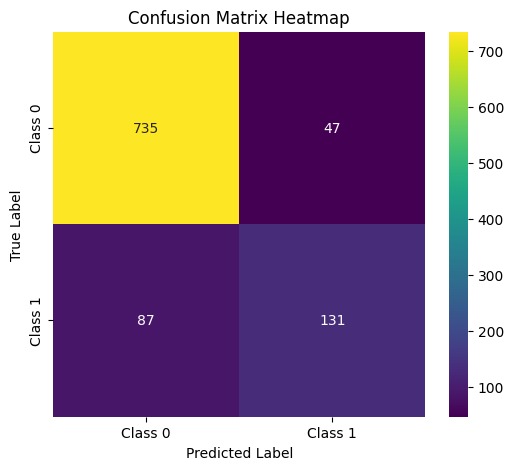

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       782
         1.0       0.74      0.60      0.66       218

    accuracy                           0.87      1000
   macro avg       0.82      0.77      0.79      1000
weighted avg       0.86      0.87      0.86      1000



In [83]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y3_test.to_numpy(),y3_pred)
class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

class_report = classification_report(y3_test.to_numpy(),y3_pred)
print(rf"Classification Report:")
print( class_report)


## comparing bruth force , kd tree , ball tree:
* our  model is based  on bruth force model which give one query and gets the distanceand etc...  

In [86]:
from sklearn.neighbors import KNeighborsClassifier
import time
bruth_model = KNeighborsClassifier(n_neighbors=10 , algorithm="brute")
kd_model = KNeighborsClassifier(n_neighbors=10 , algorithm="kd_tree")
ball_model = KNeighborsClassifier(n_neighbors=10 , algorithm="ball_tree")

bruth_model.fit(X_train_ex_col , y_train)
kd_model.fit(X_train_ex_col , y_train)
ball_model.fit(X_train_ex_col , y_train)

start_b = time.time()
bruth_model.predict(X_test_ex_col)
end_b = time.time()
print(f"time bruth : {end_b  - start_b}")

start_k = time.time()
kd_model.predict(X_test_ex_col)
end_k = time.time()
print(f"time kdtree : {end_k  - start_k}")

start_ba = time.time()
ball_model.predict(X_test_ex_col)
end_ba = time.time()
print(f"time ball-tree : {end_ba  - start_ba}")

time bruth : 0.15424656867980957
time kdtree : 4.388338804244995
time ball-tree : 8.736315727233887
